<center><h1> <font color="green"><u>Active-Case Predictions ~ 19-nCoV</u></font> </h1></center>

<center><h3> <font color="#cc0000"><u>Active Cases(%) out of Confirmed</u></font> </h3></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Data Filtering <br />
> * Training & Testing datasets <br />
> * Prediction <br />
> * Visualization (Scatter Plots) <br />

<br />

## Creating Datasets

In [58]:
# setting the working directory
setwd("~/Documents/A-tracking-of-COVID-19/COVID-19/ready_to_use")

In [59]:
# Loading desired libraries
library(ggplot2)
library(stringr)

# loading plotting/machine learning
library(tidyverse)
library(caret)
library(mlbench)
library(kernlab)
library(rpart)

<hr />

In [67]:
# includes data of all the countries
all = read.csv('COVID-19/Mixed/countryWise_bulk_summary.csv')

# includes data of four majour location
three = read.csv('COVID-19/THREE/Three_dataset_locationWise.csv')
#all
#three

In [68]:

# extracting the desired dataset
extractDatases <- function(region){
    if(region %in% c("Hubei", "World")) {
    temp = three[which(str_detect(three$Location, region)),]
    row.names(temp) <- NULL
} else {
    temp = all[which(str_detect(all$Country, region)),]
    row.names(temp) <- NULL
}

return(temp)
}


In [7]:
# country list
countries = matrix(levels(as.factor(all$Country)))
#head(countries, 10)

# Four majour locations
locations = matrix(levels(as.factor(three$Location)))
#locations

<br /> 
### Choosing desired Country/Region

In [ ]:
# country i.e. to be used throughout the analysis
 rName = "World" # without hubei

# some other possible values of rName:
# 'World', 'Hubei', 'Diamond Cruise', 'Italy', 'Japan'.....etc

<hr />

In [10]:
# filtering out desired country/location 
if(rName == "China"){
    region1 = extractDatases(rName)

    # joining Hubei for complete data of china
    region2 = extractDatases("Hubei")

    region = cbind(region1[,1:3], region1[,4:7]+region2[,4:7])
    colnames(region) <- colnames(region1)
} else {
    region = extractDatases(rName)
}

tail(region)

,Location,Day,Date,Confirmed,Deaths,Active.Cases,Closed.Cases
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>
121,World,121,21-05-2020,5057774,328998,4728776,328998
122,World,122,22-05-2020,5166873,334255,4832618,334255
123,World,123,23-05-2020,5267185,338196,4928989,338196
124,World,124,24-05-2020,5365075,341137,5023938,341137
125,World,125,25-05-2020,5453669,344241,5109428,344241
126,World,126,26-05-2020,5548562,348200,5200362,348200


<hr />

In [69]:
region=region[,c(2, 4:7)]
head(region, 10)

,Confirmed,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<dbl>,<dbl>
1,111,111,0,100,0
2,210,210,0,100,0
3,392,392,0,100,0
4,673,673,0,100,0
5,1060,1060,0,100,0
6,1504,1504,0,100,0
7,2024,2024,0,100,0
8,2612,2612,0,100,0
9,3331,3331,0,100,0


In [12]:
# calculate the percent (using Confirmed cases as total)
percent <- function(dfName){
    get(dfName) -> df
    part <- NULL
    
    for(i in 1:nrow(df)) {
        val = df[i,"Active.Cases"]
        Total = df[i,"Confirmed"]
        
        
        if(i == 1)
            if(val==0)
                part = 0
            else
                part = as.numeric((val*100)/Total)
        else
            if(val==0)
                part = c(part, 0)
            else
                part <- c(part, as.numeric((val*100)/Total))
    }
        
    return(part)
}

<hr />

In [13]:
# CASES -> percentage
region$'percent_active' = percent("region")     # Active cases, out of every 100 Confirmed cases
region$'percent_closed' = 100-percent("region") # Closed cases, out of every 100 Confirmed cases

In [70]:
tail(region)

,Confirmed,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<dbl>,<dbl>
121,5057774,4728776,328998,93.49520,6.504798
122,5166873,4832618,334255,93.53081,6.469193
123,5267185,4928989,338196,93.57919,6.420811
124,5365075,5023938,341137,93.64152,6.358476
125,5453669,5109428,344241,93.68790,6.312099
126,5548562,5200362,348200,93.72450,6.275500


In [15]:
#write.csv(region, file = "COVID-19/regionToPredictActive.csv")

<br />* Dataset is ready

<hr /><br />

### Understanding the plot

Warning message:
“Use of `region$Day` is discouraged. Use `Day` instead.”
Warning message:
“Use of `region$percent_active` is discouraged. Use `percent_active` instead.”


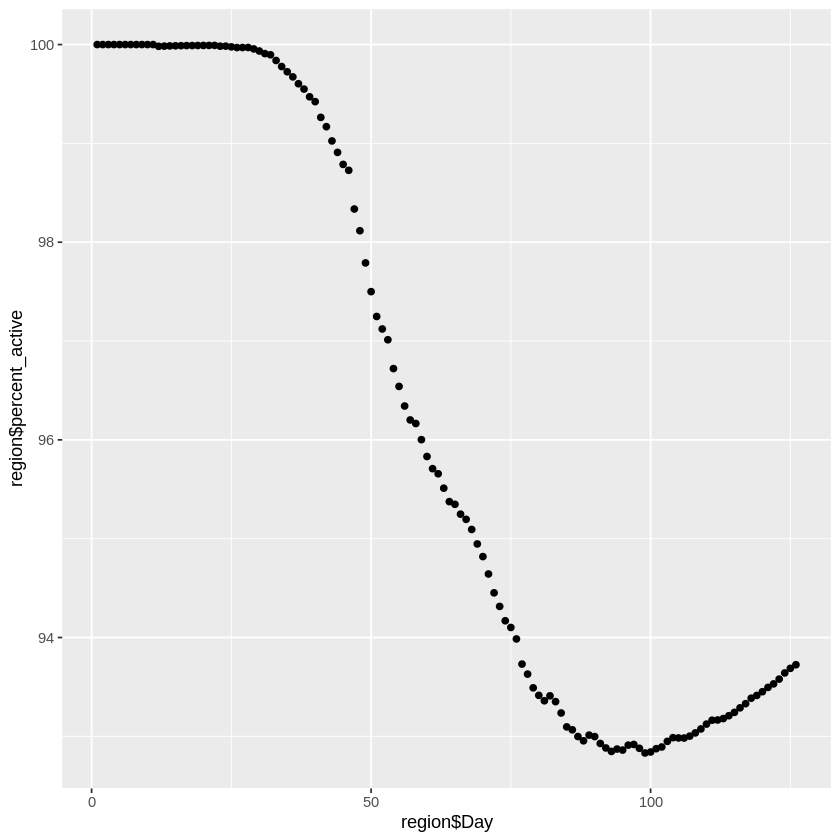

In [16]:
# Day vs %Closed Cases
region.scatter.plot <- ggplot(region, aes(x = region$Day, y = region$percent_active)) +
                        geom_point()
region.scatter.plot

In [17]:
tail(region)

,Day,Confirmed,Deaths,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
121,121,5057774,328998,4728776,328998,93.49520,6.504798
122,122,5166873,334255,4832618,334255,93.53081,6.469193
123,123,5267185,338196,4928989,338196,93.57919,6.420811
124,124,5365075,341137,5023938,341137,93.64152,6.358476
125,125,5453669,344241,5109428,344241,93.68790,6.312099
126,126,5548562,348200,5200362,348200,93.72450,6.275500


<br /><hr /><br />

## Data-Analysis <br />

In [18]:
# setting the theme
theme_set(theme_classic())
temp = region[c(70:74),]
region = region[-c(70:74),]
temp

,Day,Confirmed,Deaths,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
70,70,791081,40987,750094,40987,94.81886,5.181138
71,71,866693,46431,820262,46431,94.64274,5.357260
72,72,947653,52575,895078,52575,94.45208,5.547917
73,73,1030254,58573,971681,58573,94.31470,5.685297
74,74,1110373,64740,1045633,64740,94.16953,5.830473


In [19]:
set.seed(20) # generages same set of random sample every time

training.samples <- region$Day %>%
  createDataPartition(p = 0.8, list = FALSE)

train.data  <- region[training.samples, ]
test.data <- region[-training.samples, ]

In [20]:
tail(train.data, 3)
head(test.data, 3)

,Day,Confirmed,Deaths,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
122,122,5166873,334255,4832618,334255,93.53081,6.469193
123,123,5267185,338196,4928989,338196,93.57919,6.420811
124,124,5365075,341137,5023938,341137,93.64152,6.358476


,Day,Confirmed,Deaths,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
7,7,2024,0,2024,0,100.00000,0.000000000
10,10,4122,0,4122,0,100.00000,0.000000000
21,21,11436,1,11435,1,99.99126,0.008744316


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



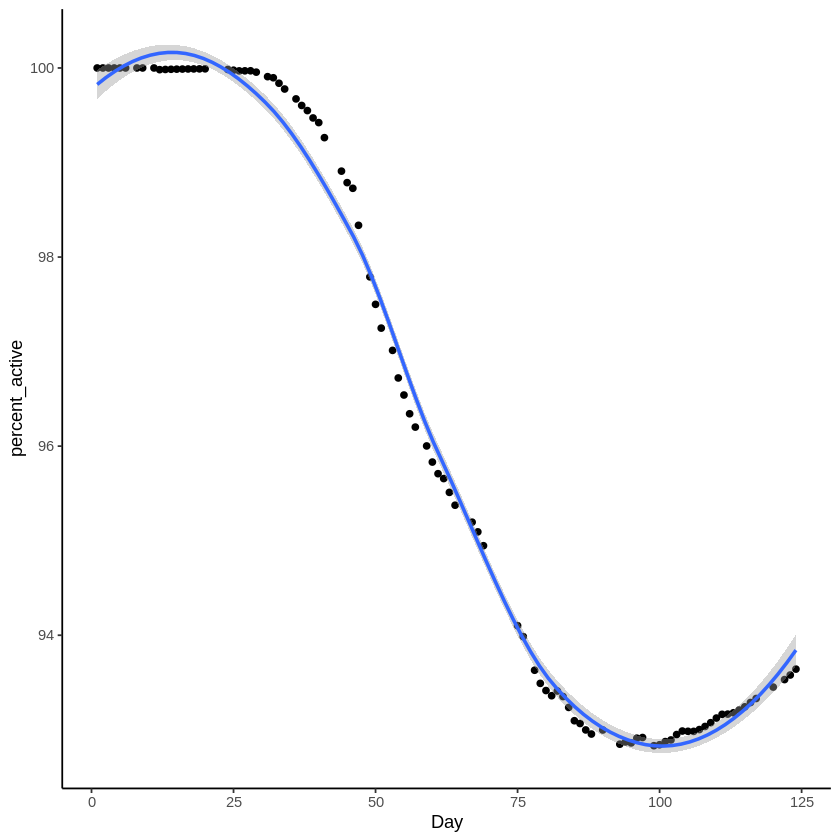

In [21]:
ggplot(train.data, aes(Day, percent_active) ) +
  geom_point() +
  stat_smooth()

<br /><hr /><br />

## Regrassion

### 1. Linear regression

In [22]:
# building linear model
fit.lm = lm(Day ~ percent_active, data = train.data)
#summary(fit.lm)

In [23]:
#Residual Standard error (Like Standard Deviation)
k=length(fit.lm$coefficients)-1
#Multiple R-Squared (Coefficient of Determination)
SSyy=sum((train.data$percent_active-mean(train.data$percent_active))**2)
    
SSE=sum(fit.lm$residuals**2)
n=length(fit.lm$residuals)
    
# final
rmse = sqrt(SSE/(n-1))
rse = sqrt(SSE/(n-(1+k))) #Residual Standard Error
r2 = (SSyy-SSE)/SSyy


# Model performance
data.frame(
       RMSE = rmse,
       RSE = rse,
       R2 = r2
     )

RMSE,RSE,R2
<dbl>,<dbl>,<dbl>
11.85968,11.92194,-14.26377


<br />

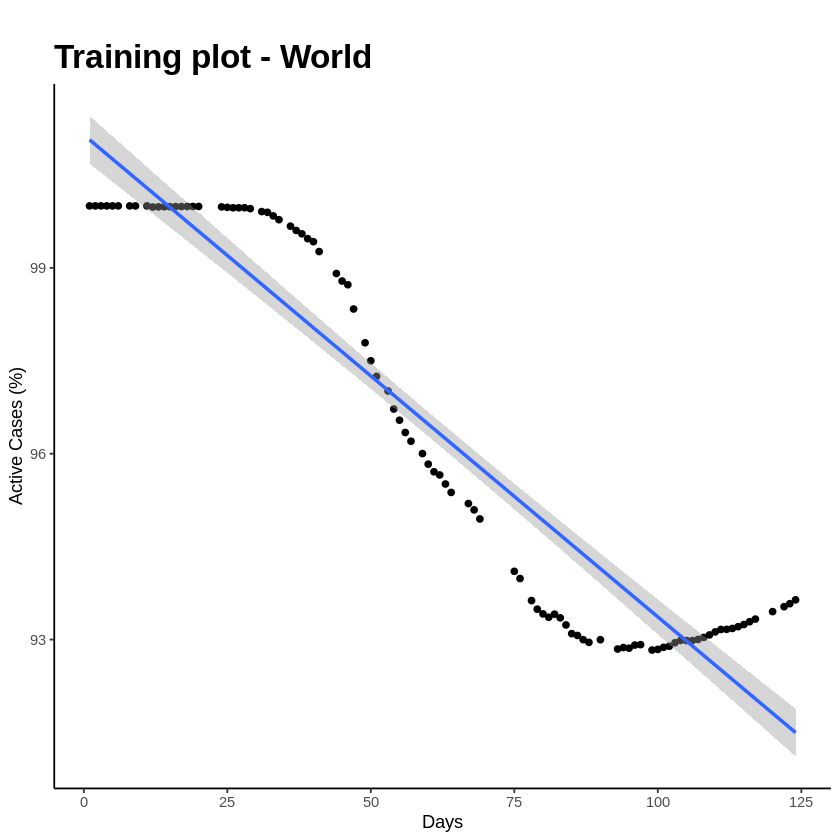

In [24]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

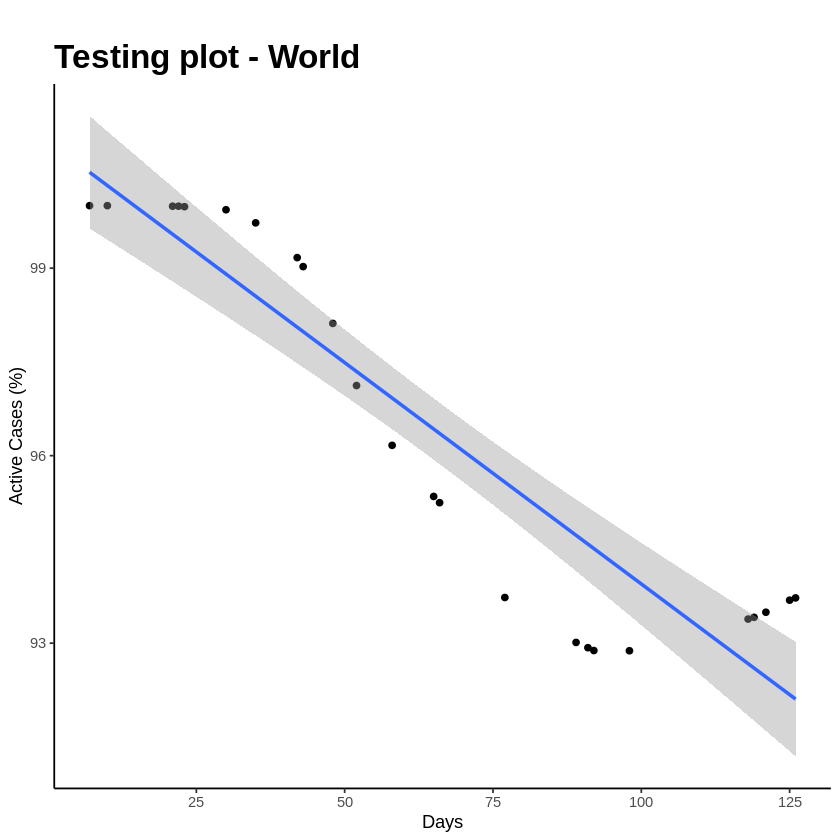

In [25]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br />

In [26]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.lm, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.lm, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
117,117,93.33053,96.54693
120,120,93.45136,95.15357
122,122,93.53081,94.23750
123,123,93.57919,93.67958
124,124,93.64152,92.96077


,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
118,118,93.38577,95.91001
119,119,93.41378,95.58699
121,121,93.49520,94.64807
125,125,93.68790,92.42599
126,126,93.72450,92.00395


<br />

### 2. Polynomial regression

In [27]:
# Model performance
plm.predictions = data.frame(
  Degree = NULL,
  RMSE = NULL,
  RSE = NULL,
  R2 = NULL
)


for(deg in 1:20){
    
    # building polynomial model
    fit.plm = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)
    #summary(fit.plm)

    
    #Residual Standard error (Like Standard Deviation)
    k=length(fit.plm$coefficients)-1
    #Multiple R-Squared (Coefficient of Determination)
    SSyy=sum((train.data$percent_active-mean(train.data$percent_active))**2)
    
    SSE=sum(fit.plm$residuals**2)
    n=length(fit.plm$residuals)
    
    
    # final
    rmse = sqrt(SSE/(n-1))
    rse = sqrt(SSE/(n-(1+k))) #Residual Standard Error
    r2 = (SSyy-SSE)/SSyy
    
    temp <- data.frame(
                        Degree = deg,
                        RMSE = rmse,
                        RSE = rse,
                        R2 = r2
                      )
    
    plm.predictions = rbind(plm.predictions, temp)
}

plm.predictions#[which(plm.predictions$RMSE == min(plm.predictions$RMSE)),]

Degree,RMSE,RSE,R2
<int>,<dbl>,<dbl>,<dbl>
1,0.97408292,0.97919626,0.8970307
2,0.93643082,0.94634042,0.9048372
3,0.32922528,0.33449322,0.9882374
4,0.30405127,0.31059075,0.9899675
5,0.18230409,0.18724547,0.9963933
6,0.14378386,0.14849933,0.9977564
7,0.14272700,0.14823364,0.9977893
8,0.12779261,0.13347503,0.9982277
9,0.11777523,0.12371716,0.9984947


In [28]:
temp = data.frame( Degree = NULL, RMES = NULL, R2 = NULL)

for(dg in 1:20){
    model = lm(percent_active ~ poly(Day, dg, raw = TRUE), data = train.data)
    
    t = predict(model, train.data)

    # Model performance
    t2 = data.frame(
          Degree = dg,
          RMSE = RMSE(t, train.data$Day),
          R2 = R2(t, train.data$Day)
        )
    
    temp = rbind(temp, t2)
}
temp

Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”


Degree,RMSE,R2
<int>,<dbl>,<dbl>
1,52.07019,1.0000000
2,52.07087,0.9913725
3,52.07817,0.9077077
4,52.07833,0.9061214
5,52.07889,0.9002777
6,52.07901,0.8990478
7,52.07901,0.8990182
8,52.07905,0.8986233
9,52.07907,0.8983831


In [29]:
deg = 10  # degree of polynomial # 11 is far better then 16

# building polynomial model
fit.plm = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)
#summary(model)

In [30]:
p = predict(fit.plm, train.data)

# Model performance
data.frame(
  RMSE = RMSE(p, train.data$Day),
  R2 = R2(p, train.data$Day)
)

RMSE,R2
<dbl>,<dbl>
52.07908,0.8982935


<br />

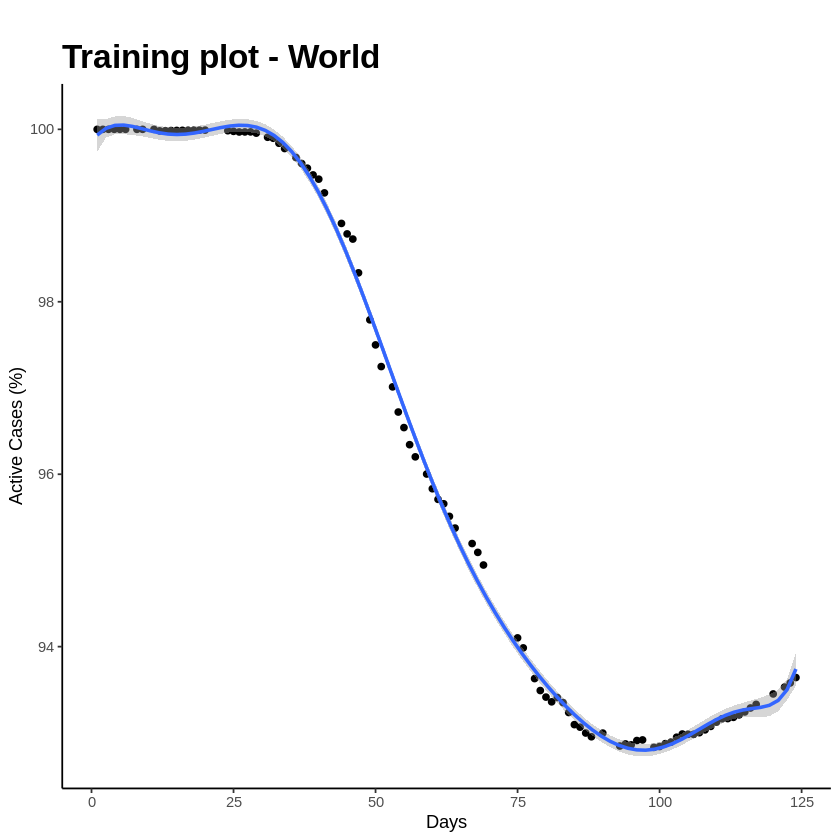

In [31]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

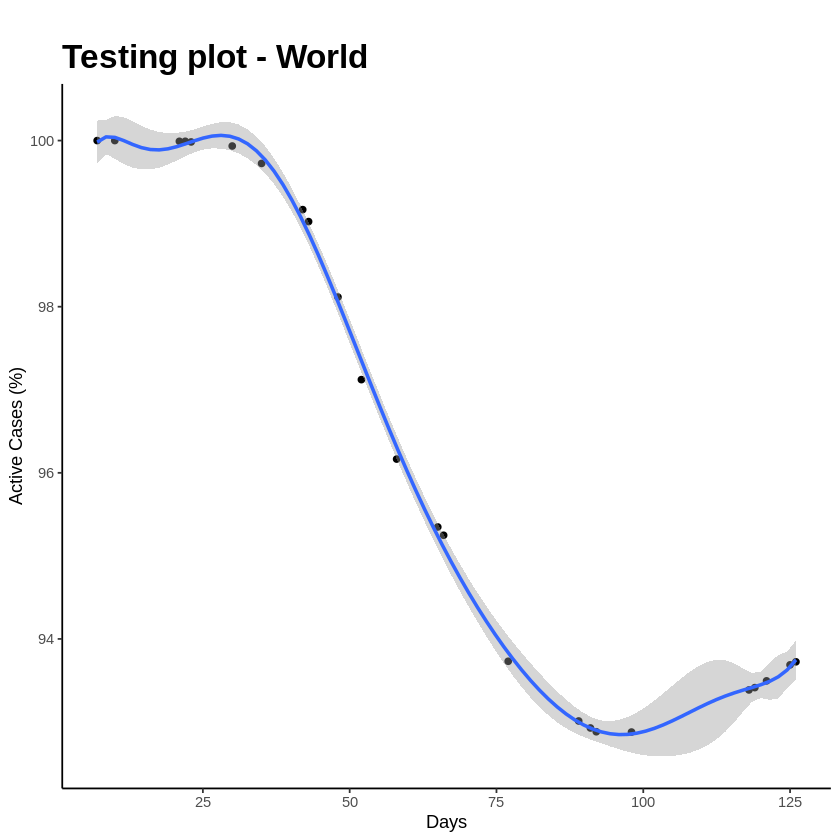

In [32]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br /><br />

In [33]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.plm, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.plm, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
117,117,93.33053,93.28828
120,120,93.45136,93.33864
122,122,93.53081,93.45626
123,123,93.57919,93.57027
124,124,93.64152,93.74076


,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
118,118,93.38577,93.29786
119,119,93.41378,93.31273
121,121,93.49520,93.38320
125,125,93.68790,93.98681
126,126,93.72450,94.33157


<br /> 
### 3. SVMK Regression

In [34]:
# model
fit.svmk <- ksvm(percent_active~Day, train.data, kernel="rbfdot")
#summary(fit.svmk)

In [35]:
predictions <- fit.svmk %>% predict(train.data)

In [36]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE,R2
<dbl>,<dbl>
51.93948,0.8950974


<br />

In [37]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.svmk, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.svmk, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
117,117,93.33053,93.60081
120,120,93.45136,93.72006
122,122,93.53081,93.82165
123,123,93.57919,93.88074
124,124,93.64152,93.94585


,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
118,118,93.38577,93.63699
119,119,93.41378,93.67652
121,121,93.49520,93.76825
125,125,93.68790,94.01718
126,126,93.72450,94.09477


<br />

`geom_smooth()` using formula 'y ~ x'



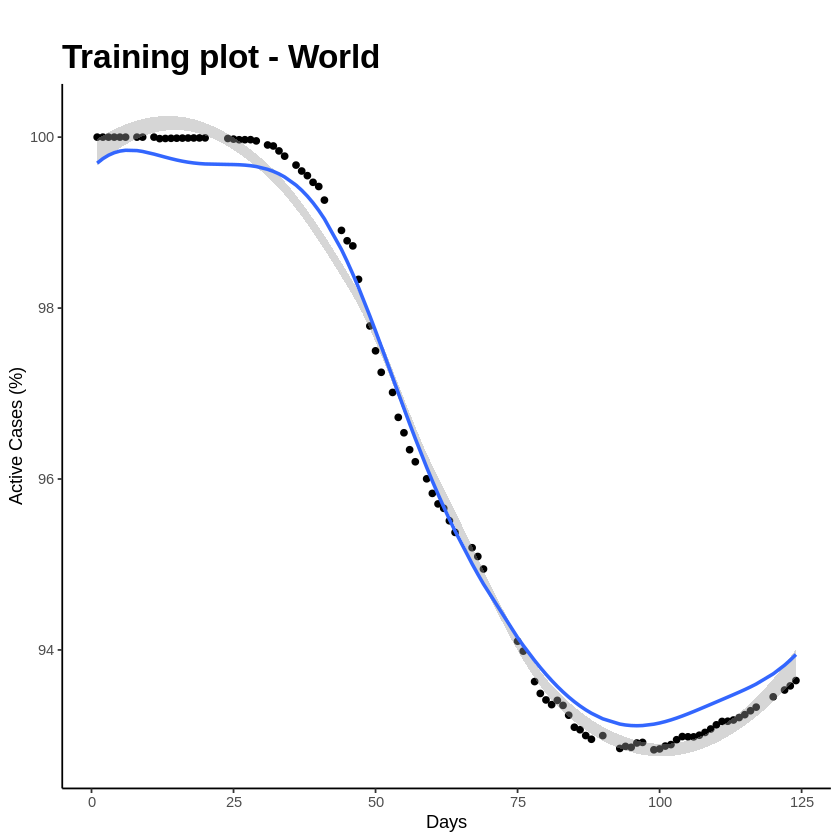

In [38]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=trained, method="loess", size=0) +
              geom_line(data = trained, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

`geom_smooth()` using formula 'y ~ x'



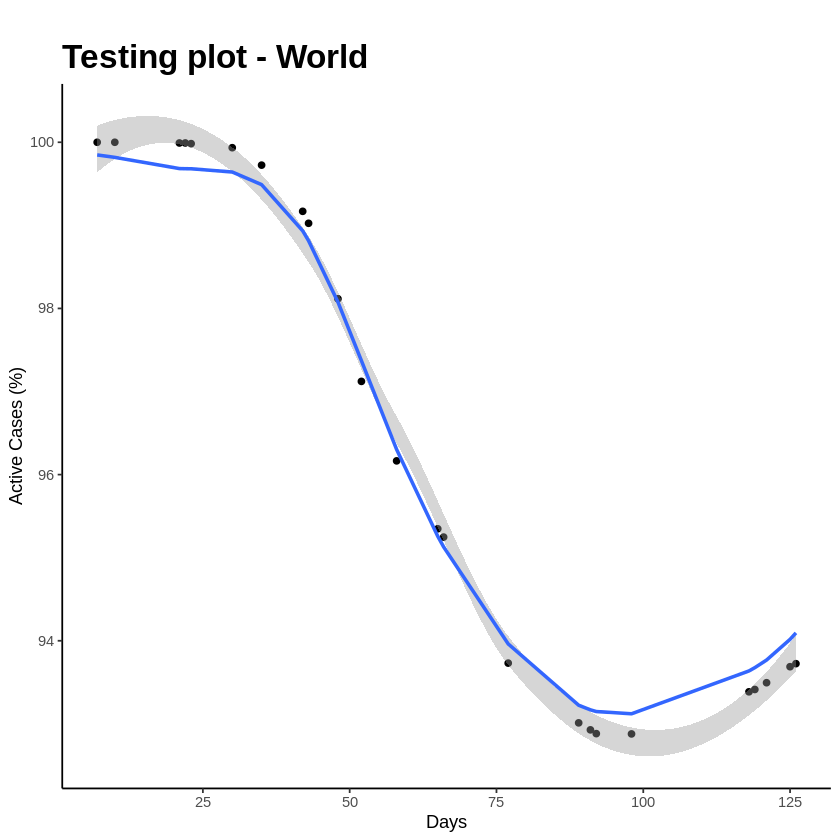

In [39]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = tested, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br /> 
### 4. KNN Regression

In [40]:
x <- as.matrix(train.data[,1])
y <- as.matrix(train.data[,7])

In [41]:
# fit model
fit.knn <- knnreg(x, y, k=2)
#summary(fit.knn)

In [42]:
predictions <- fit.knn %>% predict(x)

In [43]:
data.frame(
  RMSE = RMSE(predictions, x),
  R2 = R2(predictions, x)
)

RMSE,R2
<dbl>,<dbl>
67.87309,0.8969273


<br />

In [44]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.knn, as.matrix(train.data[,1]))
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.knn, as.matrix(test.data[,1]))
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
117,117,93.33053,6.690584
120,120,93.45136,6.508914
122,122,93.53081,6.445002
123,123,93.57919,6.416160
124,124,93.64152,6.389643


,Day,percent_active,Pridicted_percent_active
,<int>,<dbl>,<dbl>
118,118,93.38577,6.643268
119,119,93.41378,6.609051
121,121,93.49520,6.508914
125,125,93.68790,6.389643
126,126,93.72450,6.389643


<br />

`geom_smooth()` using formula 'y ~ x'



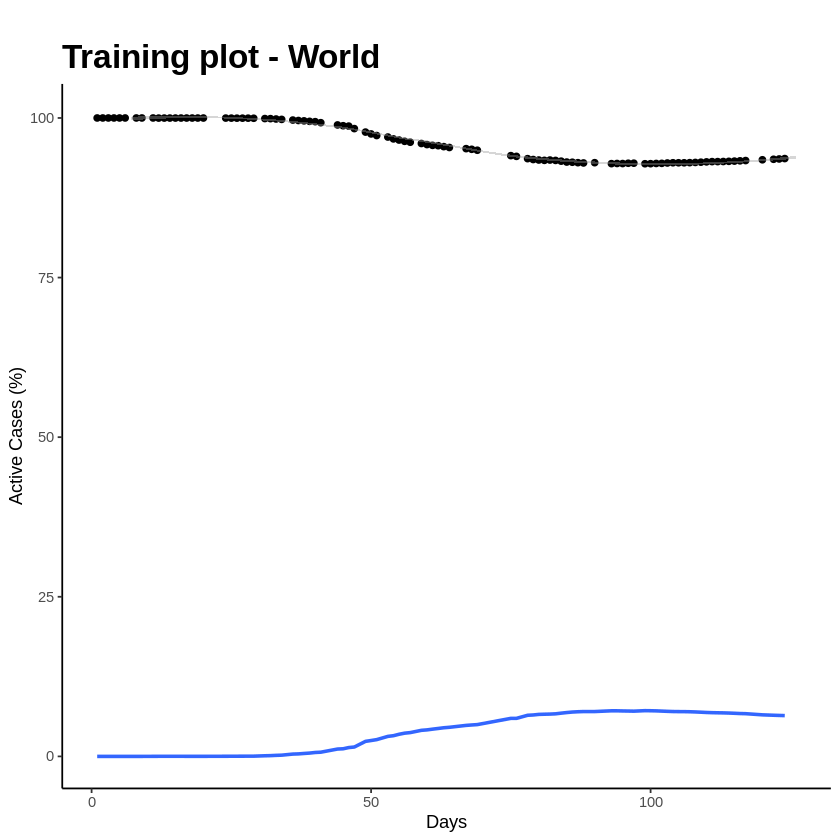

In [45]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = trained, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

`geom_smooth()` using formula 'y ~ x'



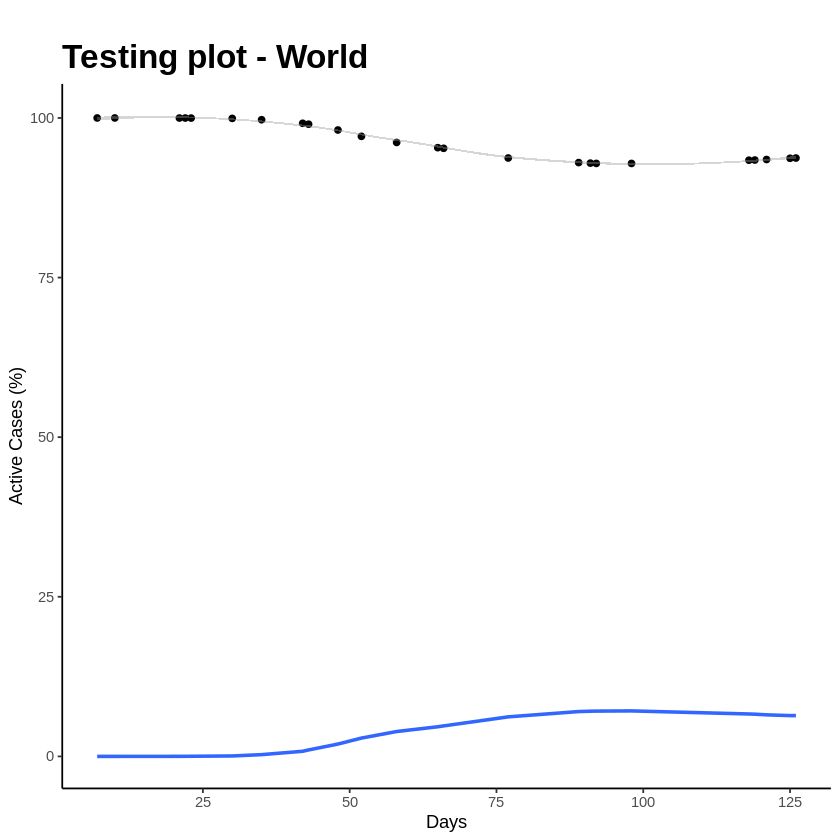

In [46]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = tested, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br />

<br /><hr /><br />

## Predictions

In [47]:
test_Miscellaneous = data.frame(
                        Day = rep(NaN, 18),
                        #Confirmed = NaN,
                        #Active.Cases = NaN,
                        percent_active = 8.2854
                        #percent_closed = NaN
                     )

In [48]:
# 13th March ---> day 52
dNo = c(62:79)    # get the day no. to pridict

test_Miscellaneous$'Day' = dNo

test_Miscellaneous

Day,percent_active
<int>,<dbl>
62,8.2854
63,8.2854
64,8.2854
65,8.2854
66,8.2854
67,8.2854
68,8.2854
69,8.2854
70,8.2854


<br /> 
2. #### By New Model

In [49]:
# modeling variable  --->  fit

Prediction = cbind(
                "Day" = 62:79,
                "Active (%)" = c(region[62:69,"percent_active"],rep(NaN, 10)),
                #"By SVMK M." = as.numeric(predict(fit.svmk, test_Miscellaneous)),
                #"By KNN M." = predict(fit.knn, as.matrix(test_Miscellaneous[,1])),
                "By Poly M." = predict(fit.plm, test_Miscellaneous),
                "By Linear M." = predict(fit.lm, test_Miscellaneous)
             )
Prediction

#train.data

,Day,Active (%),By Poly M.,By Linear M.
1,62,95.65697,95.58980,1077.233
2,63,95.51095,95.43781,1077.233
3,64,95.37514,95.29078,1077.233
4,65,95.34773,95.14880,1077.233
5,66,95.24803,95.01191,1077.233
6,67,95.19580,94.88008,1077.233
7,68,95.09325,94.75325,1077.233
8,69,94.94680,94.63130,1077.233
9,70,NaN,94.51410,1077.233
10,71,NaN,94.40147,1077.233


In [50]:
class(predict(fit.knn, as.matrix(test_Miscellaneous[,1])))

[1] "numeric"

<br /> 
1. #### By Old Model

In [51]:
# modeling variable  --->  fit

Prediction = cbind(
                "Day" = 55:67,
                "Active (%)" = c(region[55:61,"percent_active"],rep(NaN, 7)),
                "By SVMK M." = as.numeric(predict(fit.svmk, test_Miscellaneous)),
                "By KNN M." = predict(fit.knn, as.matrix(test_Miscellaneous[,1])),
                "By Poly M." = predict(fit.plm, test_Miscellaneous),
                "By Linear M." = predict(fit.lm, test_Miscellaneous)
             )
Prediction

#train.data

Warning message in cbind(Day = 55:67, `Active (%)` = c(region[55:61, "percent_active"], :
“number of rows of result is not a multiple of vector length (arg 1)”


,Day,Active (%),By SVMK M.,By KNN M.,By Poly M.,By Linear M.
1,55,96.54076,95.67230,4.374531,95.58980,1077.233
2,56,96.34244,95.52885,4.485645,95.43781,1077.233
3,57,96.20140,95.39080,4.556954,95.29078,1077.233
4,58,96.16539,95.25789,4.639370,95.14880,1077.233
5,59,96.00207,95.12978,4.778602,95.01191,1077.233
6,60,95.83154,95.00613,4.855474,94.88008,1077.233
7,61,95.70849,94.88657,4.921383,94.75325,1077.233
8,62,NaN,94.77079,4.979973,94.63130,1077.233
9,63,NaN,94.65851,4.979973,94.51410,1077.233
10,64,NaN,94.54952,4.979973,94.40147,1077.233


<br /> 
3. #### By SVMK Model

In [52]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit.svmk, test_Miscellaneous)
             )
Prediction

Day,percent_active,percent_pridicted
<int>,<dbl>,<dbl>
62,8.2854,95.67230
63,8.2854,95.52885
64,8.2854,95.39080
65,8.2854,95.25789
66,8.2854,95.12978
67,8.2854,95.00613
68,8.2854,94.88657
69,8.2854,94.77079
70,8.2854,94.65851


<br /> 
3. #### By KNN Model

In [53]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit.knn, as.matrix(test_Miscellaneous[,1]))
             )
Prediction[]

Day,percent_active,percent_pridicted
<int>,<dbl>,<dbl>
62,8.2854,4.374531
63,8.2854,4.485645
64,8.2854,4.556954
65,8.2854,4.639370
66,8.2854,4.778602
67,8.2854,4.855474
68,8.2854,4.921383
69,8.2854,4.979973
70,8.2854,4.979973


<hr /> <br />

In [45]:
# world on day 58
# 92.63192 ---> @deg = 16
# 88.90763 ---> @deg = 19